In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import numpy as np
import math

pd.options.display.max_columns=100

In [24]:
path_to_sqlite='estate_data.sqlite'
con = sqlite3.connect(path_to_sqlite)

In [25]:
print("Tables in our database:\n")
cursor = con.cursor()
# Getting all tables from sqlite_master
sql_query = """SELECT name FROM sqlite_master WHERE type='table';"""
cursor.execute(sql_query)
sqlite_tables = cursor.fetchall()
sqlite_tables = [*map(lambda table: table[0] ,sqlite_tables)]
print(sqlite_tables)
del sqlite_tables
del sql_query

Tables in our database:

['OFFERS_HOUSES_SALE', 'DESCRIPTION_HOUSES_SALE']


In [26]:
df_description = pd.read_sql('SELECT * FROM DESCRIPTION_HOUSES_SALE', con = con)
df_offers = pd.read_sql('SELECT * FROM OFFERS_HOUSES_SALE', con = con)
df_offers.shape, df_description.shape

((4856, 14), (4853, 36))

In [27]:
# Closing the connection
con.close()

In [28]:
df_offers

,hash_id,price,price_czk,price_czk_unit,price_czk_name,land_area,lat,lon,locality,category_main,category_sub,category_type,date_download,locality_region_id
0,2698797404,5299000,5299000,,Celková cena,1,50.083549,14.434141,Praha,2,40,1,2024-02-02,10
1,3981059148,14595304,14595304,,Celková cena,157,50.147034,14.473924,"U spojů, Praha 8 - Ďáblice",2,37,1,2024-02-02,10
2,2171561036,54980000,54980000,,Celková cena,856,50.107578,14.352712,"V Trníčku, Praha 6 - Dejvice",2,37,1,2024-02-02,10
3,2357572940,19600000,19600000,,Celková cena,961,50.023621,14.443550,"Na Větrově, Praha 4 - Lhotka",2,54,1,2024-02-02,10
4,1286899020,23400000,23400000,,Celková cena,354,50.138809,14.546665,Praha 9 - Kbely,2,37,1,2024-02-02,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4851,2860658268,5857977,5857977,,Celková cena,0,50.100857,13.650740,"Trnková, Senomaty",2,37,1,2024-02-02,11
4852,751513180,19800000,19800000,,Celková cena,0,49.893295,14.327883,"Líšnice, okres Praha-západ",2,37,1,2024-02-02,11
4853,586794316,5199000,5199000,,Celková cena,0,49.948387,15.268164,"Kutná Hora, okres Kutná Hora",2,40,1,2024-02-02,11
4854,1408877900,5299000,5299000,,Celková cena,0,50.411350,14.903184,"Mladá Boleslav, okres Mladá Boleslav",2,40,1,2024-02-02,11


In [29]:
df_offers.drop(["price_czk", "price_czk_unit", "price_czk_name", "date_download", "category_type", "category_main"], axis=1, inplace= True)

In [30]:
df_offers

,hash_id,price,land_area,lat,lon,locality,category_sub,locality_region_id
0,2698797404,5299000,1,50.083549,14.434141,Praha,40,10
1,3981059148,14595304,157,50.147034,14.473924,"U spojů, Praha 8 - Ďáblice",37,10
2,2171561036,54980000,856,50.107578,14.352712,"V Trníčku, Praha 6 - Dejvice",37,10
3,2357572940,19600000,961,50.023621,14.443550,"Na Větrově, Praha 4 - Lhotka",54,10
4,1286899020,23400000,354,50.138809,14.546665,Praha 9 - Kbely,37,10
...,...,...,...,...,...,...,...,...
4851,2860658268,5857977,0,50.100857,13.650740,"Trnková, Senomaty",37,11
4852,751513180,19800000,0,49.893295,14.327883,"Líšnice, okres Praha-západ",37,11
4853,586794316,5199000,0,49.948387,15.268164,"Kutná Hora, okres Kutná Hora",40,11
4854,1408877900,5299000,0,50.411350,14.903184,"Mladá Boleslav, okres Mladá Boleslav",40,11


## Details

Cleaning:

In [31]:
df_description.columns

Index(['hash_id', 'description', 'Vlak', 'Večerka', 'Obchod', 'Bus MHD',
       'Škola', 'Školka', 'Lékař', 'Hospoda', 'Restaurace', 'Metro', 'Tram',
       'price_original', 'date_update', 'building_type', 'building_condition',
       'building_location', 'area_net', 'price_total', 'price_note',
       'area_build_up', 'date_building_approval', 'equipped',
       'energy_efficient_rating', 'building_floor_type', 'building_floor',
       'date_year_reconstruction', 'area_garden', 'garage', 'swimming_pool',
       'area_landplot', 'ownership', 'cellar', 'house_location', 'pool area'],
      dtype='object')

In [32]:
df_description.drop(["date_year_reconstruction", "date_building_approval", "price_original"], axis=1, inplace= True)

In [33]:
# 'energy_efficient_rating'
def transformer(value):
    if value != None:
        return value.split()[1]
df_description['energy_efficient_rating'] = df_description['energy_efficient_rating'].apply(lambda row: transformer(row))
df_description['energy_efficient_rating'].value_counts()

energy_efficient_rating
G    2319
B     889
C     448
D     196
A     172
E      58
F      53
Name: count, dtype: int64

In [34]:
columns_to_transform = ["price_total"]
for col in columns_to_transform:
    # 1.
    df_description[col].replace(np.nan, "None", inplace=True)
    # 2.
    df_description[col] = df_description[col].apply(lambda x: x.replace("\xa0", ""))
    # 3.
    df_description[col].replace("None", np.nan, inplace=True)

del columns_to_transform

settings = {"hash_id" : np.int64,
                "area_net" : np.float64,
                "price_total" : np.float64,
                "area_build_up" : np.float64,
                "area_garden" : np.float64,
                "Lékař" : np.float64,
                "Tram" : np.float64,
                "Metro": np.float64,
                "Vlak" : np.float64,
                "Obchod": np.float64,
                "pool area": np.float64
    }

df_description = df_description.astype(settings)
del settings

In [35]:
df_description.dtypes

hash_id                      int64
description                 object
Vlak                       float64
Večerka                    float64
Obchod                     float64
Bus MHD                    float64
Škola                      float64
Školka                     float64
Lékař                      float64
Hospoda                    float64
Restaurace                 float64
Metro                      float64
Tram                       float64
date_update                 object
building_type               object
building_condition          object
building_location           object
area_net                   float64
price_total                float64
price_note                  object
area_build_up              float64
equipped                    object
energy_efficient_rating     object
building_floor_type         object
building_floor              object
area_garden                float64
garage                      object
swimming_pool              float64
area_landplot       

In [36]:
# Join
df = df_description.merge(df_offers, on = "hash_id", how = "inner")
df.shape

(4853, 40)

In [37]:
df.rename(columns={'locality_region_id': 'region',
                   "Večerka": "Vecerka",
                   "Škola": "Skola",
                   "Školka": "Skolka",
                   "Lékař" : "Lekar",
                   "Bus MHD": "Bus"
                    },
          inplace = True)

In [38]:
df.drop(["description"], axis=1, inplace= True)

Adding distance to center:

In [39]:
df["lat_cen"] = 50.0875000
df["lon_cen"] = 14.4213889

In [40]:
def haversine_distance(row):
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(math.radians, [row['lat_cen'], row['lon_cen'], row['lat'], row['lon']])

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = math.sin(dlat / 2) ** 2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    # Radius of the Earth in kilometers
    R = 6371

    # Calculate the distance
    distance = R * c

    return distance

df["city_dist"] = df.apply(haversine_distance, axis=1)

In [41]:
df.city_dist.describe()

count    4853.000000
mean       30.718110
std        17.968444
min         0.911700
25%        16.433052
50%        27.021978
75%        43.752624
max        80.747033
Name: city_dist, dtype: float64

<Axes: >

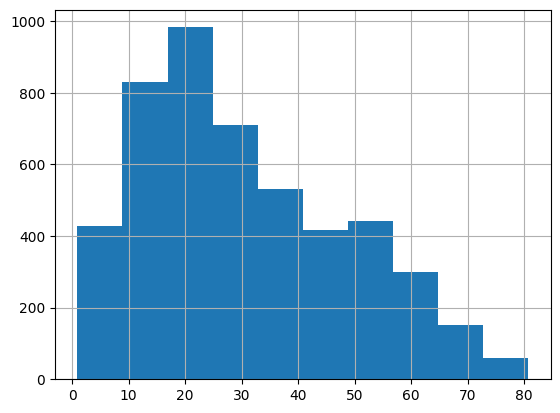

In [42]:
df.city_dist.hist()

In [43]:
df = df[df["price"] != 1]
df = df[df["category_sub"] == 37]
df.drop(["price_total", "category_sub", "ownership", "pool area", "equipped", "land_area", "area_build_up", "area_garden"], axis=1, inplace= True) 
df.loc[(df.area_landplot < df.area_net) & (df.building_floor.isna()), "area_landplot"] = df.loc[(df.area_landplot < df.area_net) & (df.building_floor.isna()), "area_landplot"] + df.loc[(df.area_landplot < df.area_net) & (df.building_floor.isna()), "area_net"]

KeyError: "['Unnamed: 0'] not found in axis"

In [ ]:
df.describe()

## Saving:

In [ ]:
# SQLlite:

# path_to_sqlite='estate_data.sqlite'
# con = sqlite3.connect(path_to_sqlite)

# df.to_sql(name = "FINAL_TABLE", con= con, index = False, if_exists = 'append')

# con.close()

In [ ]:
# # Delete table:


# path_to_sqlite='estate_data.sqlite'
# con = sqlite3.connect(path_to_sqlite)

# # Create a cursor object to execute SQL queries
# cursor = con.cursor()

# # Specify the table name you want to delete
# table_name = "FINAL_TABLE"

# # Construct and execute the SQL query to delete the table
# query = f"DROP TABLE IF EXISTS {table_name};"
# cursor.execute(query)

# # Commit the changes
# con.commit()

# # Close the cursor and connection
# cursor.close()
# con.close()

In [ ]:
# CSV:

df.to_csv("data.csv")

In [ ]:
# Excel:

excel_file_path = 'output.xlsx'
df.to_excel(excel_file_path, index=False)